In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Load and wrangle the data

### 2. Use pandas to load two data tables from this paper

In [2]:
#import information about the number and parental origin of 
#each de novo mutation detected in an offspring individual
mutation_df = pd. read_csv ("aau1043_dnm.tsv")
mutation_df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
#ages of the parents of each proband
age_df = pd. read_csv ("aau1043_parental_age.tsv")
age_df 

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


### 3.Count the number of de novo mutations per proband. 

In [12]:
count_df=pd.DataFrame(columns=['Proband_id', 'pat_dnm', 'mat_dnm', 'tot_dnm'])
father_C=mutation_df[mutation_df['Phase_combined']=="father"].value_counts('Proband_id')
mother_C=mutation_df[mutation_df['Phase_combined']=="mother"].value_counts('Proband_id').sort_index()
total_C=mutation_df.value_counts('Proband_id').sort_index()

In [25]:
father_list=list(father_C.sort_index())
mother_list=list(mother_C.sort_index())
total_list=list(total_C.sort_index())

In [29]:
count_df['Proband_id']=age_df['Proband_id']
count_df['pat_dnm']=father_list
count_df['mat_dnm']=mother_list
count_df['tot_dnm']=total_list

count_df

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,675,51,19,70
1,1097,26,12,39
2,1230,42,12,57
3,1481,53,14,68
4,1806,61,11,78
...,...,...,...,...
391,153657,41,8,49
392,154565,61,14,75
393,154621,39,11,50
394,154810,55,14,69


### 4.Use the pandas merge function to combine the above data frame with the data frame with maternal and paternal ages.

In [35]:
merge_df=count_df.merge(age_df)
merge_df

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,675,51,19,70,31,36
1,1097,26,12,39,19,19
2,1230,42,12,57,30,28
3,1481,53,14,68,32,20
4,1806,61,11,78,38,34
...,...,...,...,...,...,...
391,153657,41,8,49,27,23
392,154565,61,14,75,36,30
393,154621,39,11,50,19,18
394,154810,55,14,69,32,28


## Fit and interpret linear regression models
### Plot:
- the count of maternal de novo mutations vs. maternal age


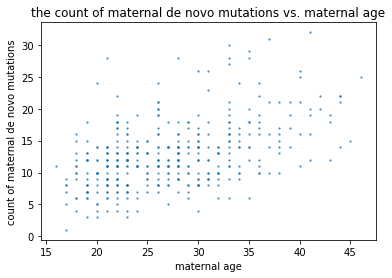

In [47]:
fig, ax= plt.subplots()
ax.scatter(x=merge_df['Mother_age'],y=merge_df['mat_dnm'],alpha=0.6,s=2)
ax.set_xlabel('maternal age')
ax.set_ylabel('count of maternal de novo mutations')
ax.set_title('the count of maternal de novo mutations vs. maternal age')
plt.show()

- the count of paternal de novo mutations vs. paternal age

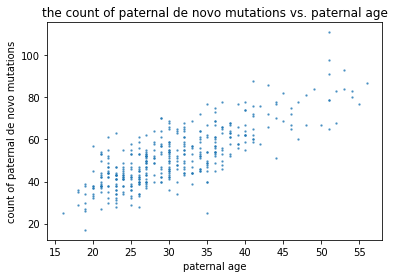

In [62]:
fig, ax= plt.subplots()
ax.scatter(x=merge_df['Father_age'],y=merge_df['pat_dnm'],alpha=0.6,s=2)
ax.set_xlabel('paternal age')
ax.set_ylabel('count of paternal de novo mutations')
ax.set_title('the count of paternal de novo mutations vs. paternal age')
plt.show()

### 6. Use ordinary least squares smf.ols() to test for an association between maternal age and maternally inherited de novo mutations.

In [63]:
model_1 = smf.ols(formula = "mat_dnm ~ 1 + Mother_age" , data = merge_df)
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        08:51:56   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The relationship is significant as p value is smaller than 0.05.
- 22.8% variation in maternally inherited de novo mutations is explained by mother age.

### 7. Use ordinary least squares smf.ols() to test for an association between paternal age and paternally inherited de novo mutations.


In [64]:
model_1 = smf.ols(formula = "pat_dnm ~ 1 + Father_age" , data = merge_df)
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        08:59:58   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The relationship is significant as p value is smaller than 0.05, even more significant than relationship in mother side.
- 61.9% variation in paternally inherited de novo mutations is explained by father age, also bigger than mother.

### 8. Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency.

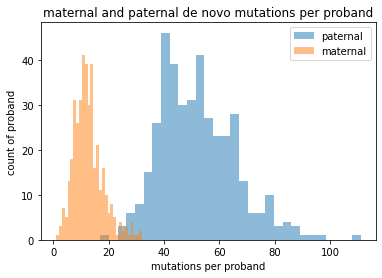

In [69]:
fig,ax=plt.subplots()
ax.hist(merge_df['pat_dnm'],bins=30,alpha=0.5,label='paternal')
ax.hist(merge_df['mat_dnm'],bins=30,alpha=0.5,label='maternal')
ax.set_title('maternal and paternal de novo mutations per proband')
ax.set_xlabel('mutations per proband')
ax.set_ylabel('count of proband')
plt.legend()
plt.show()

- Maternal de novo mutations is less than paternal de novo mutations per proband in all

### 9. Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [70]:
stats.ttest_ind(merge_df['pat_dnm'],merge_df['mat_dnm'])

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

- As the p value is much smaller than 0.05, so the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [136]:
male_ttest_pd=pd.DataFrame(columns=['gender','mut_dnm'])
ttest_pd['gender']='male'


In [130]:
# merge_df['mat-pat']=merge_df['mat_dnm']-merge_df['pat_dnm']
model_test = smf.ols(formula = "mat_dnm ~ 1 + pat_dnm" , data = merge_df)
results_test = model_test.fit()
results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     65.71
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           6.66e-15
Time:                        10:34:36   Log-Likelihood:                -1178.7
No. Observations:                 396   AIC:                             2361.
Df Residuals:                     394   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4039      0.941      5.743      0.000       3.554       7.254
pat_dnm        0.1418      0.017      8.106      0.000       0.107       0.176
==============================================================================
Omnibus:                       42.748   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.621
Skew:                           0.785   Prob(JB):                     5.07e-13
Kurtosis:                       3.983   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- In the regression model for mat dnm ~ pat dnm, if H0 is corret, intercept coef should be 0 and pat_dnm coef should be one, but here the pvalues for intercept and pat_dnm are smaller than 0.05, which means that we reject the null hypothesis that mat dnm and pat dnm has no difference.

## Generalized linear models: Poisson regression


### 10. Re-fit the models (questions 9, 10, and 12) above using Poisson regression.



#### question 6

In [74]:
model_2 = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age" , data = merge_df)
results_2 = model_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        09:33:06   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

- The p value is smaller than 0.05 and smaller than the ones in ols model, so the relationship is still significant.
- The pseudo R square is 0.07164, but this is different with the R quare in ols model.

#### question 7 

In [76]:
model_p = smf.poisson(formula = "pat_dnm ~ 1 + Father_age" , data = merge_df)
results_p = model_p.fit()
results_p.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        09:33:34   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

- The p value is smaller than 0.05, so the relationship is still significant.
- The pseudo R square is 0.2277, which is bigger than mother relationship, indicating that the relationship between paternal mutation and father age is greater than maternal mutation and mother age.

### question 9

In [137]:
model_p = smf.poisson(formula = "pat_dnm ~ 1 + mat_dnm" , data = merge_df)
results_p = model_p.fit()
results_p.summary()

Optimization terminated successfully.
         Current function value: 4.384364
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                 0.05379
Time:                        11:07:27   Log-Likelihood:                -1736.2
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                 7.684e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7100      0.019    199.212      0.000       3.674       3.747
mat_dnm        0.0185      0.001     14.260      0.000       0.016       0.021
==============================================================================
"""

- The p value is smaller than 0.05 for intercept and mat_dnm, so still the two groups has significant difference.

### 11. predict the number of paternal de novo mutations for a proband with a father who was 50.5 years old at the proband's time of birth.

In [80]:
new_obs=pd.DataFrame ({"Father_age":[50.5]})
results_p.predict(new_obs)

0    82.031316
dtype: float64

- It is predicted that there will be 82.031316 mutations for a proband with a father who was 50.5 years old.

# Advanced exercise
## get data
- I loaded a data set for temperature in Australia to see if there is climate change over the years.

In [125]:
tem_df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/temperature.csv")

In [114]:
date=list(tem_df['date'])
year=[]
month=[]
day=[]

for i in date:
    year.append(int(i[0:4]))
    month.append(int(i[5:7]))
    day.append(int(i[8:10]))
    
tem_df['year']=year
tem_df['month']=month
tem_df['day']=day

tem_df



,city_name,date,temperature,temp_type,site_name,month,year,day
0,PERTH,1910-01-01,26.7,max,PERTH AIRPORT,1,1910,1
1,PERTH,1910-01-02,27.0,max,PERTH AIRPORT,1,1910,2
2,PERTH,1910-01-03,27.5,max,PERTH AIRPORT,1,1910,3
3,PERTH,1910-01-04,24.0,max,PERTH AIRPORT,1,1910,4
4,PERTH,1910-01-05,24.8,max,PERTH AIRPORT,1,1910,5
...,...,...,...,...,...,...,...,...
528273,MELBOURNE,2019-05-27,7.8,min,MELBOURNE (OLYMPIC PARK),5,2019,27
528274,MELBOURNE,2019-05-28,8.2,min,MELBOURNE (OLYMPIC PARK),5,2019,28
528275,MELBOURNE,2019-05-29,8.7,min,MELBOURNE (OLYMPIC PARK),5,2019,29
528276,MELBOURNE,2019-05-30,6.7,min,MELBOURNE (OLYMPIC PARK),5,2019,30


### 13. Generate figures to explore these data. What patterns do you notice?

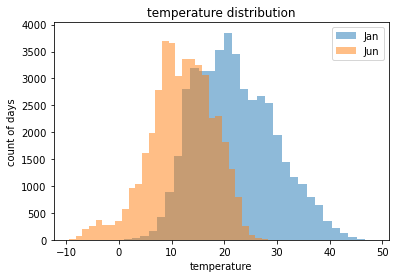

In [121]:
fig, ax = plt.subplots()
ax.hist(tem_df[tem_df['month']==1]['temperature'],bins=30,alpha=0.5,label='Jan')
ax.hist(tem_df[tem_df['month']==6]['temperature'],bins=30,alpha=0.5,label='Jun')
ax.set_title('temperature distribution')
ax.set_xlabel('temperature')
ax.set_ylabel('count of days')
plt.legend()
plt.show()

- From this fiure we can see that the temperatures are seperated to 2 groups, and the temperature of June is higher than that in Jan for overall distribution

In [122]:
tem0905_df=tem_df[(tem_df['month']==9)&(tem_df['day']==5)]
tem0905_df

,city_name,date,temperature,temp_type,site_name,month,year,day
247,PERTH,1910-09-05,18.0,max,PERTH AIRPORT,9,1910,5
612,PERTH,1911-09-05,16.5,max,PERTH AIRPORT,9,1911,5
978,PERTH,1912-09-05,15.4,max,PERTH AIRPORT,9,1912,5
1343,PERTH,1913-09-05,23.5,max,PERTH AIRPORT,9,1913,5
1708,PERTH,1914-09-05,19.7,max,PERTH AIRPORT,9,1914,5
...,...,...,...,...,...,...,...,...
526548,MELBOURNE,2014-09-05,4.8,min,MELBOURNE (OLYMPIC PARK),9,2014,5
526913,MELBOURNE,2015-09-05,10.2,min,MELBOURNE (OLYMPIC PARK),9,2015,5
527279,MELBOURNE,2016-09-05,12.8,min,MELBOURNE (OLYMPIC PARK),9,2016,5
527644,MELBOURNE,2017-09-05,6.5,min,MELBOURNE (OLYMPIC PARK),9,2017,5


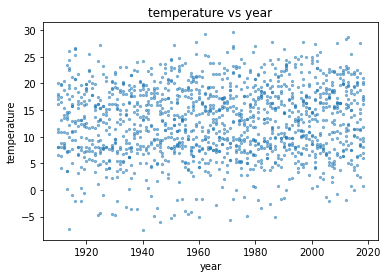

In [124]:
fig, ax = plt.subplots()
ax.scatter(tem0905_df['year'],tem0905_df['temperature'],alpha=0.5,s=5)
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.set_title('temperature vs year')
plt.show()

- I plotted the temperature vs year for 0905 here, but the plot shows almost no relationship between temperature and year.

### 14. Pose a question about the data that can be tested with a linear regression model.

- Is there any relationship between temperature for Sep 5th over years?

### 15. Fit your model, evaluate the model fit, and test your hypothesis with the .summary() method.

In [129]:
model_15 = smf.ols(formula = "temperature ~ 1 + year" , data = tem0905_df)
results_15 = model_15.fit()
results_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.192
Date:                Sat, 05 Sep 2020   Prob (F-statistic):            0.00741
Time:                        10:20:05   Log-Likelihood:                -4739.9
No. Observations:                1432   AIC:                             9484.
Df Residuals:                    1430   BIC:                             9494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.9946     11.159     -1.523      0.128     -38.885       4.896
year           0.0152      0.006      2.682      0.007       0.004       0.026
==============================================================================
Omnibus:                       18.037   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.782
Skew:                          -0.199   Prob(JB):                     0.000374
Kurtosis:                       2.673   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We can see that for year, the p value is 0.007, which is smaller than 0.05, which means temperatures has relationship with years, but the R square is small so it is not the best variable to interpret the temperature

In [138]:
model_15 = smf.ols(formula = "temperature ~ 1 + year+month+day" , data = tem_df)
results_15 = model_15.fit()
results_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5749.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:13:54   Log-Likelihood:            -1.8193e+06
No. Observations:              524813   AIC:                         3.639e+06
Df Residuals:                  524809   BIC:                         3.639e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.7388      0.679    -26.120      0.000     -19.070     -16.408
year           0.0187      0.000     54.242      0.000       0.018       0.019
month         -0.3697      0.003   -119.158      0.000      -0.376      -0.364
day           -0.0030      0.001     -2.495      0.013      -0.005      -0.001
==============================================================================
Omnibus:                     2779.479   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2848.895
Skew:                           0.170   Prob(JB):                         0.00
Kurtosis:                       3.119   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- If we put all of the variables (month, year and day), we could see that month actually has the most relationship with temperature, and that makes sense as temperature changes along with month in a year.